# **Neural Network**

## Keras
https://keras.io/

Created by: [François Chollet](https://fchollet.com/)

## Fashion MNIST

This is a dataset of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images. This dataset can be used as a drop-in replacement for MNIST.

### Prepare the data

- Reference: https://keras.io/api/datasets/fashion_mnist/

- ```x_train```: NumPy array of grayscale image data: shapes **(60000, 28, 28)**. Pixel values range from **0 to 255**.

- ```y_train```: NumPy array of digit labels (integers in range 0-9): shape **(60000,)**.

- ```x_test```: NumPy array of grayscale image data: shapes **(10000, 28, 28)**. Pixel values range from **0 to 255**.

- ```y_test```: NumPy array of digit labels (integers in range 0-9): shape **(10000,)**.

- 0	T-shirt/top
- 1	Trouser
- 2	Pullover
- 3	Dress
- 4	Coat
- 5	Sandal
- 6	Shirt
- 7	Sneaker
- 8	Bag
- 9	Ankle boot

In [5]:
import tensorflow
from tensorflow import keras

(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [6]:
num_classes = 10

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

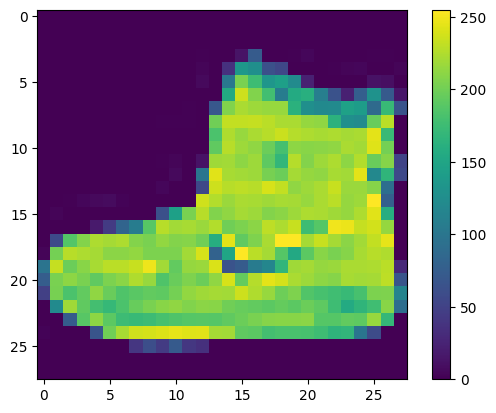

In [7]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(x_train[0])
plt.colorbar() #b/c the images are black and white so this will add some color 
plt.grid(False)
plt.show()

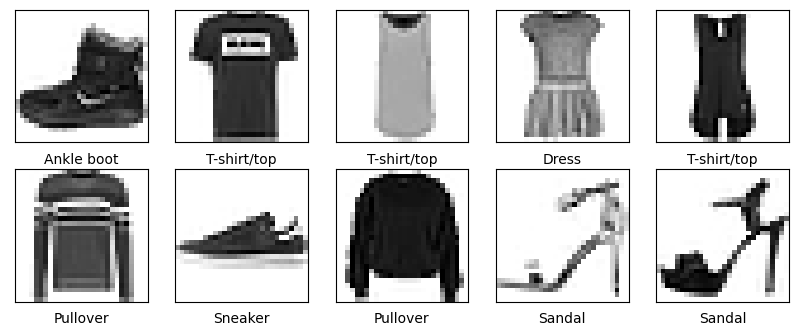

In [8]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [9]:
# Normalizing pixels
# Convert data to the [0,1] -> find Derivative more easily 
# Pixel values range from 0-255 => /255
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

x_train shape: (60000, 28, 28)
x_test shape: (10000, 28, 28)
60000 train samples
10000 test samples


### Build the model

In [10]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)), 
    keras.layers.Dense(256, activation = "relu"), 
    keras.layers.Dense(64, activation = "relu"), 
    keras.layers.Dense(num_classes, activation = "softmax")
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 64)                16448     
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________


### Train the model

In [11]:
batch_size = 64 # devide input to small groups
epochs = 15
model.compile(
    optimizer = "adam",
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)
model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, validation_split = 0.1)

Epoch 1/15
844/844 [==============================] - 3s 3ms/step - loss: 0.4988 - accuracy: 0.8245 - val_loss: 0.4216 - val_accuracy: 0.8437
Epoch 2/15
844/844 [==============================] - 2s 3ms/step - loss: 0.3683 - accuracy: 0.8663 - val_loss: 0.3726 - val_accuracy: 0.8612
Epoch 3/15
844/844 [==============================] - 2s 3ms/step - loss: 0.3298 - accuracy: 0.8793 - val_loss: 0.3401 - val_accuracy: 0.8708
Epoch 4/15
844/844 [==============================] - 2s 3ms/step - loss: 0.3106 - accuracy: 0.8857 - val_loss: 0.3287 - val_accuracy: 0.8785
Epoch 5/15
844/844 [==============================] - 2s 3ms/step - loss: 0.2870 - accuracy: 0.8938 - val_loss: 0.3252 - val_accuracy: 0.8795
Epoch 6/15
844/844 [==============================] - 2s 3ms/step - loss: 0.2762 - accuracy: 0.8964 - val_loss: 0.3277 - val_accuracy: 0.8857
Epoch 7/15
844/844 [==============================] - 2s 3ms/step - loss: 0.2622 - accuracy: 0.9023 - val_loss: 0.3204 - val_accuracy: 0.8843
Epoch 

### Evaluate the trained model

In [16]:
score = model.evaluate(x_test, y_test)
print(f"loss = {score[0]}")
print(f"Accuracy = {score[1]}")

313/313 [==============================] - 1s 2ms/step - loss: 0.3541 - accuracy: 0.8861
loss = 0.35406866669654846
Accuracy = 0.8860999941825867


In [13]:
predictions = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [14]:
import numpy as np

def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

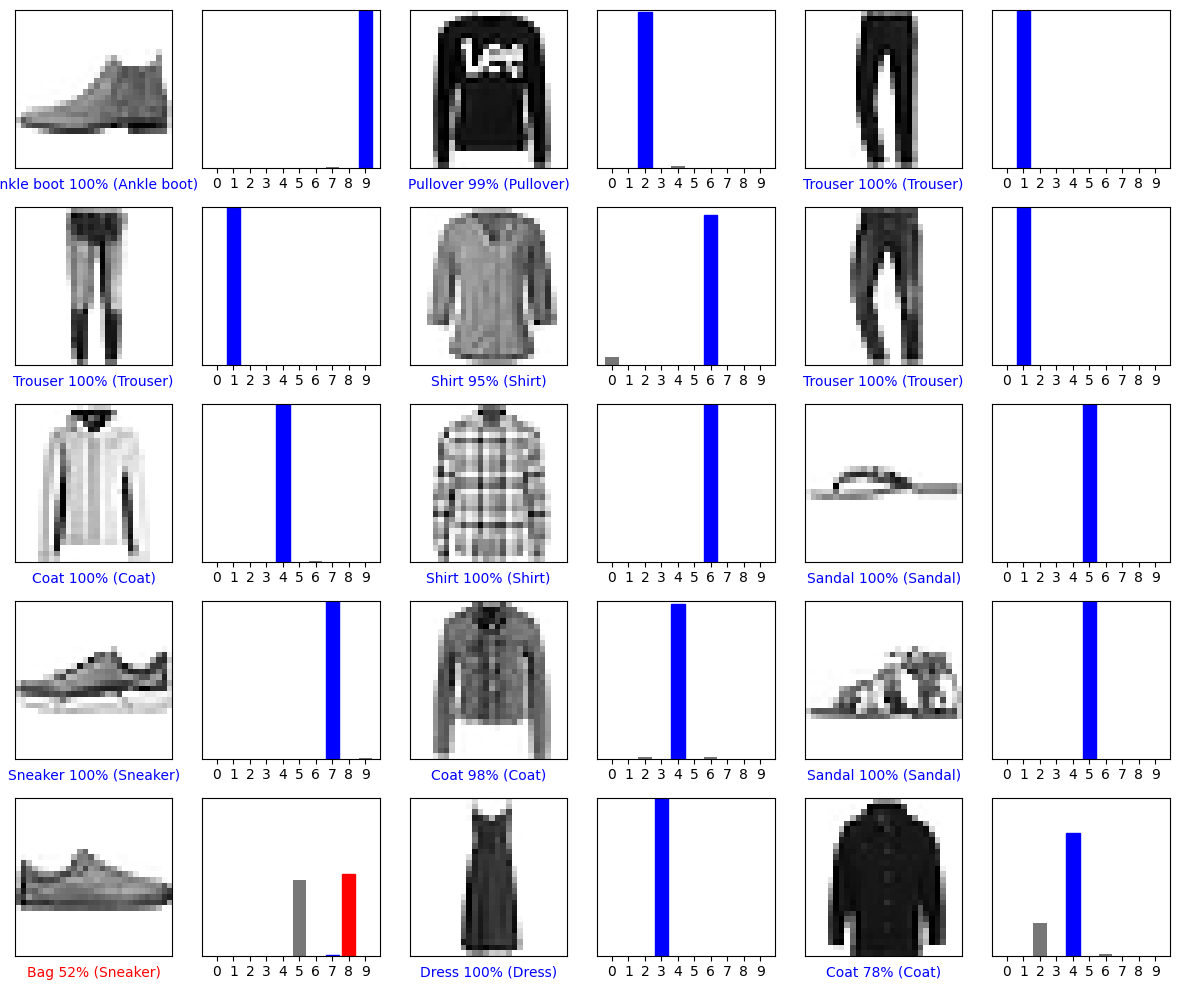

In [15]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()